# New Section

In [ ]:
import os
import random
from shutil import copy
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from sklearn.model_selection import KFold

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Path ke dataset di Google Drive
DATASET_DIR = '/content/drive/MyDrive/DATASET/ASIA'
categories = ['Down Syndrome', 'Healthy']

# Inisialisasi total gambar
total_images = 0

print("Renaming Results:")
print("=================")

for category in categories:
    category_dir = os.path.join(DATASET_DIR, category)
    if os.path.isdir(category_dir):
        count = 0  # Counter untuk setiap kategori
        for idx, filename in enumerate(os.listdir(category_dir), start=1):
            old_path = os.path.join(category_dir, filename)
            if os.path.isfile(old_path):
                # Buat nama baru
                new_filename = f"{category.replace(' ', '_')}_{idx:03}.jpg"  # Ganti spasi dengan underscore
                new_path = os.path.join(category_dir, new_filename)
                os.rename(old_path, new_path)
                count += 1
                print(f"{filename} -> {new_filename}")
        print(f"\nJumlah gambar di kategori '{category}': {count}")
        total_images += count

print("\n=================")
print(f"Total gambar di dataset: {total_images}")


Renaming Results:
down_1004_jpg.rf.49b05473862427c71a433d70574561e0.jpg -> Down_Syndrome_001.jpg
down_1005_jpg.rf.c17f750685ba5cfea73dc058a367edad.jpg -> Down_Syndrome_002.jpg
down_1007_jpg.rf.40bb1cba224172669a417fa349b95ac8.jpg -> Down_Syndrome_003.jpg
down_1010_jpg.rf.323af843c2078ee6e56bed36f8ba08a8.jpg -> Down_Syndrome_004.jpg
down_1009_jpg.rf.a9fdf45ab35209df6e85b17af19bb4da.jpg -> Down_Syndrome_005.jpg
down_1008_jpg.rf.315e6e56a1f05562ee70703880c39b71.jpg -> Down_Syndrome_006.jpg
down_1026_jpg.rf.afaa152a18054bf7008a70b4bcda7c24.jpg -> Down_Syndrome_007.jpg
down_1021_jpg.rf.ae69ae115e093b19efa0fc3f946f5966.jpg -> Down_Syndrome_008.jpg
down_101_jpg.rf.24055da8950fd9910f5c68927d1746ed.jpg -> Down_Syndrome_009.jpg
down_1012_jpg.rf.32d0537b07941c9076657eb085bd1900.jpg -> Down_Syndrome_010.jpg
down_1018_jpg.rf.dc8da05bb734efa9f7d0e34c91f1ef6f.jpg -> Down_Syndrome_011.jpg
down_1013_jpg.rf.122a12d29b934582b4b44cb56ae9fd8d.jpg -> Down_Syndrome_012.jpg
down_1017_jpg.rf.edce7e2746cf56b66c

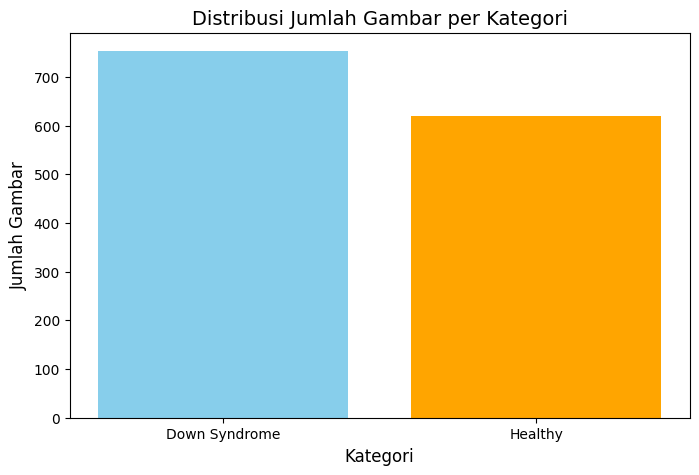

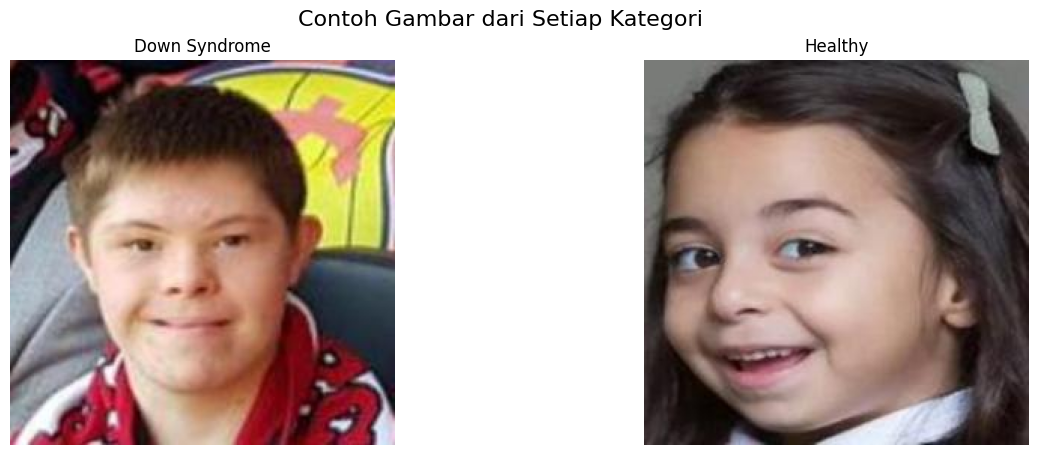

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Menghitung jumlah gambar di setiap kategori
category_counts = {}
for category in categories:
    category_dir = os.path.join(DATASET_DIR, category)
    if os.path.isdir(category_dir):
        count = len([file for file in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, file))])
        category_counts[category] = count

# 1. Visualisasi Distribusi Jumlah Gambar per Kategori
plt.figure(figsize=(8, 5))
plt.bar(category_counts.keys(), category_counts.values(), color=['skyblue', 'orange'])
plt.title('Distribusi Jumlah Gambar per Kategori', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah Gambar', fontsize=12)
plt.show()

# 2. Menampilkan Contoh Gambar dari Setiap Kategori
fig, axs = plt.subplots(1, len(categories), figsize=(15, 5))

for i, category in enumerate(categories):
    category_dir = os.path.join(DATASET_DIR, category)
    example_images = random.sample(os.listdir(category_dir), 3)
    axs[i].set_title(category)
    axs[i].imshow(mpimg.imread(os.path.join(category_dir, example_images[0])))
    axs[i].axis('off')

plt.suptitle('Contoh Gambar dari Setiap Kategori', fontsize=16)
plt.show()

In [ ]:
import os
import shutil
import random

# Path asal dan tujuan
data_dir = "/content/drive/MyDrive/DATASET/ASIA"
test_dir = os.path.join(data_dir, "test_data")

# Bikin folder test_data jika belum ada
os.makedirs(test_dir, exist_ok=True)

# Loop tiap kategori (Down Syndrome & Healthy)
for category in ["Down Syndrome", "Healthy"]:
    category_path = os.path.join(data_dir, category)
    test_category_path = os.path.join(test_dir, category)

    # Bikin folder test_data untuk kategori ini
    os.makedirs(test_category_path, exist_ok=True)

    # Ambil semua gambar
    images = [img for img in os.listdir(category_path) if img.endswith(('.jpg', '.png'))]
    test_size = int(len(images) * 0.1)  # 10% buat test

    # Pilih gambar secara random untuk test
    test_images = random.sample(images, test_size)

    # Pindahin gambar ke test_data
    for img in test_images:
        shutil.move(os.path.join(category_path, img), os.path.join(test_category_path, img))

print("✅ Test data berhasil dipindahkan!")

✅ Test data berhasil dipindahkan!


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

# Path dataset asli & tujuan penyimpanan
original_data_dir = '/content/drive/MyDrive/DATASET/ASIA'
augmented_data_dir = '/content/drive/MyDrive/DATASET_AUGMENTED'

# Pastikan folder baru ada
os.makedirs(augmented_data_dir, exist_ok=True)

# Augmentasi keras
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Hitung jumlah gambar tiap kelas
category_counts = {}
for category in ['Down Syndrome', 'Healthy']:
    category_path = os.path.join(original_data_dir, category)
    category_counts[category] = len([f for f in os.listdir(category_path) if f.endswith(('.jpg', '.png'))])

# Tentukan kelas minoritas yang perlu augmentasi
max_count = max(category_counts.values())
for category, count in category_counts.items():
    input_path = os.path.join(original_data_dir, category)
    output_path = os.path.join(augmented_data_dir, category)
    os.makedirs(output_path, exist_ok=True)

    # Copy semua gambar asli ke folder baru
    image_files = [f for f in os.listdir(input_path) if f.endswith(('.jpg', '.png'))]
    for img_file in tqdm(image_files, desc=f"Copying {category}"):
        img_path = os.path.join(input_path, img_file)
        img = cv2.imread(img_path)
        cv2.imwrite(os.path.join(output_path, img_file), img)

    # Augmentasi hanya untuk kelas minoritas
    if count < max_count:
        print(f"🔹 Augmenting {category} to match {max_count} images...")
        extra_needed = max_count - count  # Berapa banyak gambar tambahan yang dibutuhkan

        i = 0
        while i < extra_needed:
            img_file = image_files[i % len(image_files)]  # Loop ulang jika habis
            img_path = os.path.join(input_path, img_file)

            # Baca gambar
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert ke RGB
            image = np.expand_dims(image, axis=0)  # Ubah ke format batch

            # Augmentasi 1 gambar per iterasi
            for batch in datagen.flow(image, batch_size=1):
                aug_img = batch[0].astype(np.uint8)
                aug_img_path = os.path.join(output_path, f"aug_{i}_{img_file}")
                cv2.imwrite(aug_img_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))

                i += 1
                if i >= extra_needed:
                    break  # Stop kalau sudah cukup

print("✅ Augmentasi selesai! Dataset sekarang seimbang.")

Copying Healthy: 100%|██████████| 558/558 [00:16<00:00, 33.80it/s]


🔹 Augmenting Healthy to match 678 images...
✅ Augmentasi selesai! Dataset sekarang seimbang.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler
import pandas as pd
import numpy as np
import os

# Path ke dataset baru (setelah augmentasi)
data_dir = '/content/drive/MyDrive/DATASET_AUGMENTED'
test_dir = '/content/drive/MyDrive/DATASET/test_data'  # Test set tetap dipisah

# Ambil daftar gambar dan labelnya
image_paths = []
labels = []
categories = ['Down Syndrome', 'Healthy']

for label, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)
    images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.endswith(('.jpg', '.png'))]
    image_paths.extend(images)
    labels.extend([label] * len(images))

# Buat DataFrame
df = pd.DataFrame({'filename': image_paths, 'label': labels})

# Ubah label ke string agar cocok dengan class_mode='categorical'
df['label'] = df['label'].astype(str)

# Set up k-fold cross-validation (5 fold)
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

# ImageDataGenerator untuk training (dengan augmentasi)
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ImageDataGenerator untuk validation & test (tanpa augmentasi)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Test data tetap konstan
test_generator = val_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

# Menyimpan hasil setiap fold
fold_accuracies = []
fold_losses = []
fold_histories = []

# Start k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kfolds.split(df)):
    print(f"\nTraining on fold {fold + 1}...")

    # Buat subset train & val dari DataFrame df
    train_df = df.iloc[train_idx].reset_index(drop=True)
    val_df = df.iloc[val_idx].reset_index(drop=True)

    # Training generator (pakai augmentasi)
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='filename',
        y_col='label',
        target_size=(224, 224),
        class_mode='categorical',
        batch_size=32,
        shuffle=True  # ✅ Agar data diacak di tiap epoch
    )

    # Validation generator (tanpa augmentasi)
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col='filename',
        y_col='label',
        target_size=(224, 224),
        class_mode='categorical',
        batch_size=32,
        shuffle=False  # ✅ Agar evaluasi tetap konsisten
    )

    # Model VGG16
    model = Sequential()
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers[:-5]:
        layer.trainable = False
    model.add(base_model)

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_vgg16_fold_{fold + 1}.keras', monitor='val_accuracy', save_best_only=True)

    history = model.fit(train_generator, validation_data=val_generator, epochs=15, callbacks=[early_stopping, model_checkpoint])

    fold_accuracies.append(max(history.history['val_accuracy']))
    fold_losses.append(min(history.history['val_loss']))
    fold_histories.append(history)

    test_loss, test_acc = model.evaluate(test_generator)
    print(f"Test accuracy for fold {fold + 1}: {test_acc}")

# Output fold accuracies dan mean accuracy
print("\n=== Hasil K-Fold Cross-Validation ===")
for i, (acc, loss) in enumerate(zip(fold_accuracies, fold_losses)):
    print(f"Fold {i+1}: Accuracy = {acc:.4f}, Loss = {loss:.4f}")

# Rata-rata akurasi & loss
print(f"\nMean Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Mean Loss: {np.mean(fold_losses):.4f}")

Found 136 images belonging to 2 classes.

Training on fold 1...
Found 1084 validated image filenames belonging to 2 classes.
Found 272 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 738ms/step - accuracy: 0.5031 - loss: 0.8817 - val_accuracy: 0.7463 - val_loss: 0.6610
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 578ms/step - accuracy: 0.6107 - loss: 0.6555 - val_accuracy: 0.7978 - val_loss: 0.5097
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 571ms/step - accuracy: 0.7699 - loss: 0.5079 - val_accuracy: 0.8382 - val_loss: 0.3694
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 612ms/step - accuracy: 0.8508 - loss: 0.3768 - val_accuracy: 0.8235 - val_loss: 0.3478
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 577ms/step - accuracy: 0.8544 - loss: 0.3569 - val_accuracy: 0.8676 - val_loss: 0.3022
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 577ms/step - accuracy: 0.9030 - loss: 0.2383 - val_accuracy: 0.8676 - val_loss: 0.3327
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 604ms/step - accuracy: 0.8697 - loss: 0.2877 - val_accuracy: 0.8713 - val_loss: 0.3374
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 559ms/step - accuracy: 0.9244 - loss: 0.2329 - val_accu

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 29s 718ms/step - accuracy: 0.5161 - loss: 0.8563 - val_accuracy: 0.6753 - val_loss: 0.6658
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 33s 552ms/step - accuracy: 0.5642 - loss: 0.6748 - val_accuracy: 0.5572 - val_loss: 0.6840
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 625ms/step - accuracy: 0.7247 - loss: 0.5595 - val_accuracy: 0.8081 - val_loss: 0.4241
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 554ms/step - accuracy: 0.7771 - loss: 0.4640 - val_accuracy: 0.7565 - val_loss: 0.4210
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 634ms/step - accuracy: 0.8043 - loss: 0.4454 - val_accuracy: 0.9041 - val_loss: 0.2953
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 573ms/step - accuracy: 0.8540 - loss: 0.3665 - val_accuracy: 0.9151 - val_loss: 0.2416
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 592ms/step - accuracy: 0.8964 - loss: 0.2761 - val_accuracy: 0.8782 - val_loss: 0.3383
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 565ms/step - accuracy: 0.9249 - loss: 0.2246 - val_accu

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 681ms/step - accuracy: 0.5133 - loss: 0.8423 - val_accuracy: 0.5646 - val_loss: 0.6622
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 36s 596ms/step - accuracy: 0.5988 - loss: 0.6495 - val_accuracy: 0.8266 - val_loss: 0.4362
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 581ms/step - accuracy: 0.7019 - loss: 0.5756 - val_accuracy: 0.8561 - val_loss: 0.3880
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 571ms/step - accuracy: 0.8059 - loss: 0.4581 - val_accuracy: 0.8561 - val_loss: 0.3166
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 567ms/step - accuracy: 0.8389 - loss: 0.3579 - val_accuracy: 0.9151 - val_loss: 0.2274
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 614ms/step - accuracy: 0.8639 - loss: 0.3286 - val_accuracy: 0.8708 - val_loss: 0.2899
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 572ms/step - accuracy: 0.8798 - loss: 0.2857 - val_accuracy: 0.9188 - val_loss: 0.2090
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 569ms/step - accuracy: 0.9350 - loss: 0.2113 - val_accu

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 684ms/step - accuracy: 0.5059 - loss: 0.8859 - val_accuracy: 0.6310 - val_loss: 0.6615
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 562ms/step - accuracy: 0.5985 - loss: 0.6599 - val_accuracy: 0.7786 - val_loss: 0.5122
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 555ms/step - accuracy: 0.7206 - loss: 0.5427 - val_accuracy: 0.7712 - val_loss: 0.4743
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 588ms/step - accuracy: 0.7241 - loss: 0.5244 - val_accuracy: 0.8450 - val_loss: 0.3728
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 583ms/step - accuracy: 0.8382 - loss: 0.3705 - val_accuracy: 0.8524 - val_loss: 0.3714
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 548ms/step - accuracy: 0.8539 - loss: 0.3983 - val_accuracy: 0.8413 - val_loss: 0.3444
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 593ms/step - accuracy: 0.8775 - loss: 0.3072 - val_accuracy: 0.8893 - val_loss: 0.2855
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 538ms/step - accuracy: 0.8998 - loss: 0.2422 - val_accu

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 650ms/step - accuracy: 0.5288 - loss: 0.8445 - val_accuracy: 0.7860 - val_loss: 0.5719
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 568ms/step - accuracy: 0.6633 - loss: 0.6322 - val_accuracy: 0.7601 - val_loss: 0.4972
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 571ms/step - accuracy: 0.7518 - loss: 0.4990 - val_accuracy: 0.8745 - val_loss: 0.3792
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 596ms/step - accuracy: 0.8168 - loss: 0.4364 - val_accuracy: 0.8819 - val_loss: 0.2838
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 573ms/step - accuracy: 0.8684 - loss: 0.2965 - val_accuracy: 0.8856 - val_loss: 0.2996
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 581ms/step - accuracy: 0.8484 - loss: 0.3238 - val_accuracy: 0.8672 - val_loss: 0.3195
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 586ms/step - accuracy: 0.9054 - loss: 0.2357 - val_accuracy: 0.8708 - val_loss: 0.2912
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 576ms/step - accuracy: 0.9319 - loss: 0.1882 - val_accu

Fold terbaik adalah Fold 3 dengan akurasi 0.9557


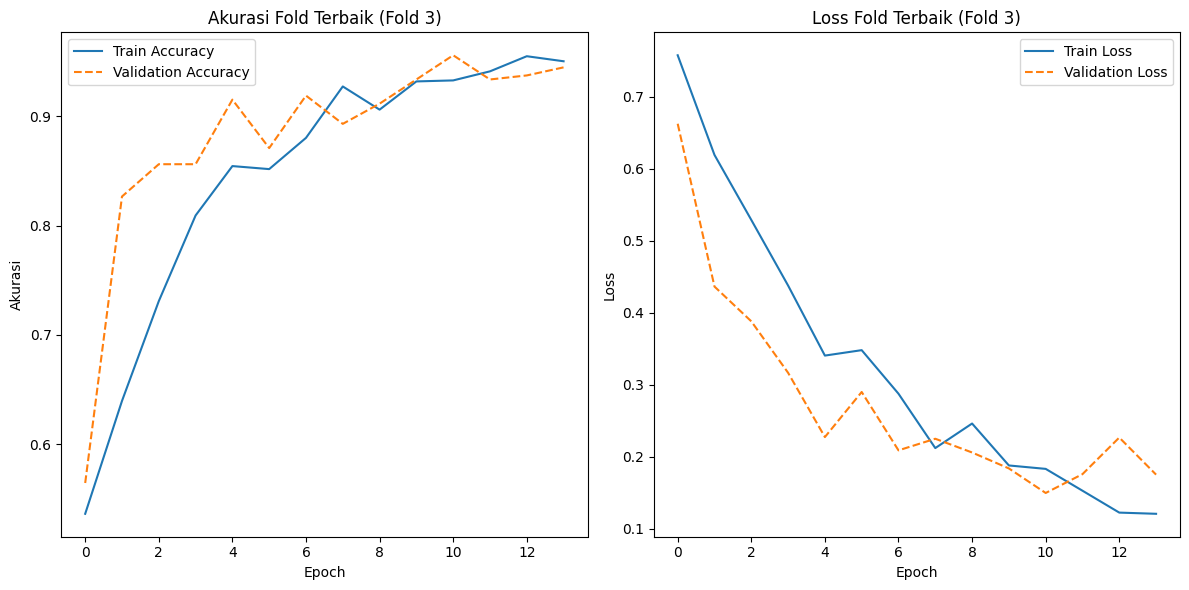

Akurasi terbaik pada fold 3: 0.9557
Loss terbaik pada fold 3: 0.1498


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pilih fold terbaik berdasarkan validasi akurasi maksimum
best_fold_index = np.argmax(fold_accuracies)  # Index fold terbaik
print(f"Fold terbaik adalah Fold {best_fold_index + 1} dengan akurasi {fold_accuracies[best_fold_index]:.4f}")

# Ambil history fold terbaik
best_history = fold_histories[best_fold_index]

# Grafik Akurasi untuk fold terbaik
plt.figure(figsize=(12, 6))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'], label='Train Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title(f'Akurasi Fold Terbaik (Fold {best_fold_index + 1})')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Loss untuk fold terbaik
plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title(f'Loss Fold Terbaik (Fold {best_fold_index + 1})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Tampilkan akurasi dan loss untuk fold terbaik
print(f"Akurasi terbaik pada fold {best_fold_index + 1}: {fold_accuracies[best_fold_index]:.4f}")
print(f"Loss terbaik pada fold {best_fold_index + 1}: {fold_losses[best_fold_index]:.4f}")

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report
import numpy as np

# Pilih fold terbaik berdasarkan validasi akurasi maksimum
best_fold_index = np.argmax(fold_accuracies)  # Index fold terbaik
print(f"Fold terbaik adalah Fold {best_fold_index + 1} dengan akurasi {fold_accuracies[best_fold_index]:.4f}")

# Load model terbaik dari fold terbaik
best_model_path = f'best_vgg16_fold_{best_fold_index + 1}.keras'
best_model = tf.keras.models.load_model(best_model_path)

# Test generator untuk fold terbaik (Gunakan ImageDataGenerator baru, tanpa validation_split)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode='categorical',  # Harus 'categorical' karena model pakai softmax
    batch_size=32,
    shuffle=False  # Jangan di-shuffle supaya urutan gambar tetap
)

# Dapatkan prediksi untuk fold terbaik
predictions = best_model.predict(test_generator)

# Konversi hasil softmax menjadi label kelas
y_pred = np.argmax(predictions, axis=1)  # Pilih kelas dengan probabilitas tertinggi

# Ambil label asli (y_true) dari generator
y_true = test_generator.classes  # Label asli dari test set

# Class labels untuk laporan
class_labels = list(test_generator.class_indices.keys())

# Generate classification report untuk fold terbaik
report = classification_report(y_true, y_pred, target_names=class_labels)

# Tampilkan laporan
print("Classification Report for Best Fold:")
print(report)

# (Optional) Simpan laporan ke file
# with open(f'classification_report_fold_{best_fold_index + 1}.txt', 'w') as f:
#     f.write(report)

Fold terbaik adalah Fold 3 dengan akurasi 0.9557
Found 136 images belonging to 2 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step
Classification Report for Best Fold:
               precision    recall  f1-score   support

Down Syndrome       0.89      0.96      0.92        75
      Healthy       0.95      0.85      0.90        61

     accuracy                           0.91       136
    macro avg       0.92      0.91      0.91       136
 weighted avg       0.91      0.91      0.91       136



Fold terbaik adalah Fold 3 dengan akurasi 0.9557
Found 136 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step


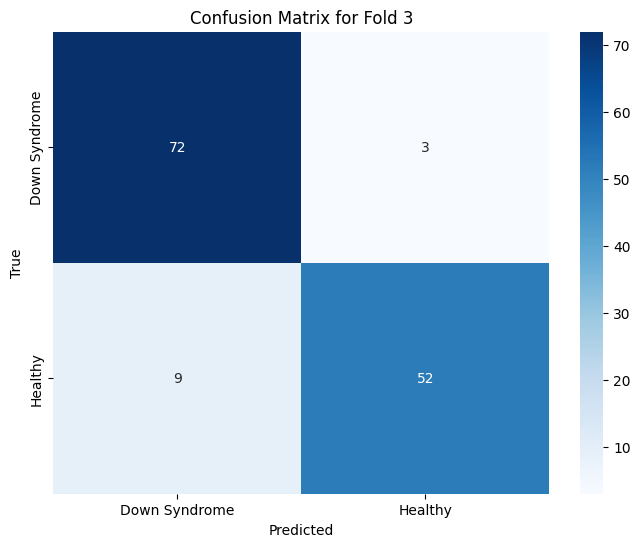

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Pilih fold terbaik berdasarkan validasi akurasi maksimum
best_fold_index = np.argmax(fold_accuracies)  # Index fold terbaik
print(f"Fold terbaik adalah Fold {best_fold_index + 1} dengan akurasi {fold_accuracies[best_fold_index]:.4f}")

# Load model terbaik dari fold terbaik
best_model_path = f'best_vgg16_fold_{best_fold_index + 1}.keras'
best_model = tf.keras.models.load_model(best_model_path)

# Test generator untuk fold terbaik (tanpa validation_split)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode='categorical',  # Sesuai dengan softmax output
    batch_size=32,
    shuffle=False  # Jangan di-shuffle supaya urutan gambar tetap
)

# Dapatkan prediksi untuk fold terbaik
predictions = best_model.predict(test_generator)

# Konversi hasil softmax menjadi label kelas
y_pred = np.argmax(predictions, axis=1)  # Pilih kelas dengan probabilitas tertinggi

# Ambil label asli (y_true) dari generator
y_true = test_generator.classes  # Label asli dari test set

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix dengan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title(f"Confusion Matrix for Fold {best_fold_index + 1}")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Jumlah DS diprediksi sebagai Healthy: 3
Jumlah Healthy diprediksi sebagai DS: 9


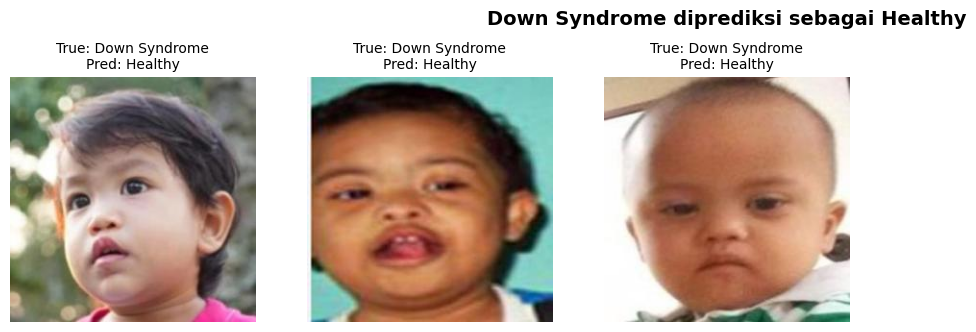

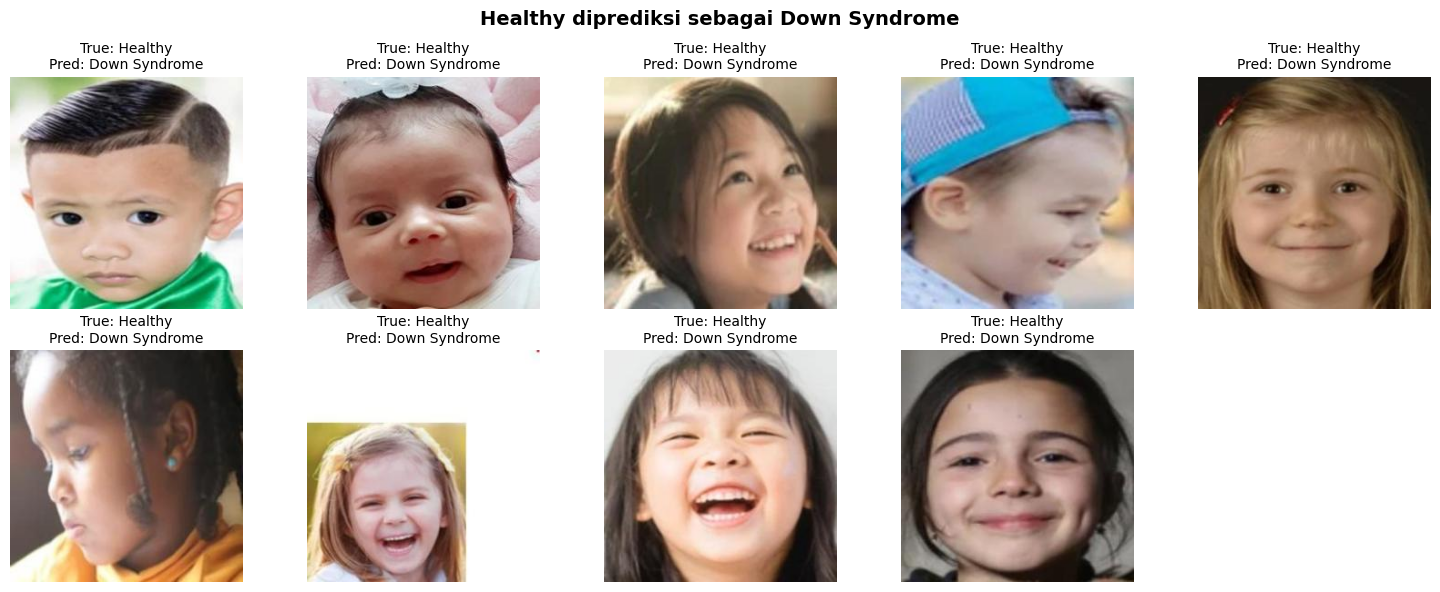

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Ambil daftar label kelas dari test generator
class_labels = list(test_generator.class_indices.keys())

# Indeks kesalahan prediksi
misclassified_indices = np.where(y_pred != y_true)[0]

# Filter berdasarkan jenis kesalahan
ds_as_healthy = [idx for idx in misclassified_indices if y_true[idx] == 0 and y_pred[idx] == 1]  # DS → Healthy
healthy_as_ds = [idx for idx in misclassified_indices if y_true[idx] == 1 and y_pred[idx] == 0]  # Healthy → DS

print(f"Jumlah DS diprediksi sebagai Healthy: {len(ds_as_healthy)}")
print(f"Jumlah Healthy diprediksi sebagai DS: {len(healthy_as_ds)}")

# Fungsi untuk menampilkan gambar
def plot_misclassified_images(indices, title, rows=2, cols=5):
    plt.figure(figsize=(cols * 3, rows * 3))
    for i, idx in enumerate(indices[:rows * cols]):  # Batasi agar grid tidak terlalu besar
        img_path = test_generator.filepaths[idx]
        img = Image.open(img_path)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        true_label = class_labels[y_true[idx]]
        pred_label = class_labels[y_pred[idx]]
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
        plt.axis('off')

    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Tampilkan kesalahan prediksi DS → Healthy
if ds_as_healthy:
    plot_misclassified_images(ds_as_healthy, "Down Syndrome diprediksi sebagai Healthy")

# Tampilkan kesalahan prediksi Healthy → DS
if healthy_as_ds:
    plot_misclassified_images(healthy_as_ds, "Healthy diprediksi sebagai Down Syndrome")

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,532,872 (146.99 MB)

 Trainable params: 10,299,202 (39.29 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 20,598,406 (78.58 MB)